In [1]:

import pprint

# Data libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Classifiers 
import xgboost

# Analysis libs
from itertools import cycle
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
malware_data_filepath = '../datasets/Obfuscated/Obfuscated-MalMem2022_edited.csv'
malware_data = pd.read_csv(malware_data_filepath)

In [8]:
malware_data = malware_data.drop(malware_data[malware_data['Class'] == 'Benign'].index)
malware_data['Category'].value_counts()

Category
Spyware       10020
Ransomware     9791
Trojan         9487
Name: count, dtype: int64

In [9]:
X_drop_columns = ['Class', 
                'Category', 
                'svcscan.interactive_process_services', 
                'handles.nport', 
                'modules.nmodules',
                'pslist.nprocs64bit', 
                'callbacks.ngeneric']
X = malware_data.drop(columns=X_drop_columns)

y_column = malware_data.Category
class_le = LabelEncoder()
y = class_le.fit_transform(y_column)

In [10]:
X.shape

(29298, 50)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=0, stratify=y)

In [12]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (20508, 50)
y_train shape: (20508,)
X_test shape: (8790, 50)
y_test shape: (8790,)


In [13]:
xgb = xgboost.XGBClassifier(device="cuda")
clf = xgb.fit(X_train, y_train)

print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 0.8594694753267018
Test accuracy: 0.7485779294653014


In [14]:
y_pred = clf.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Precision score: {precision_score(y_test, y_pred, average='weighted', zero_division=0)}")
print(f"Recall score: {recall_score(y_test, y_pred, average='weighted', zero_division=0)}")
print(f"F-1 score: {f1_score(y_test, y_pred, average='weighted', zero_division=0)}")

Accuracy score: 0.7485779294653014
Precision score: 0.7479744297910393
Recall score: 0.7485779294653014
F-1 score: 0.748120165813462


In [15]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm

array([[2117,  405,  416],
       [ 255, 2430,  321],
       [ 524,  289, 2033]])

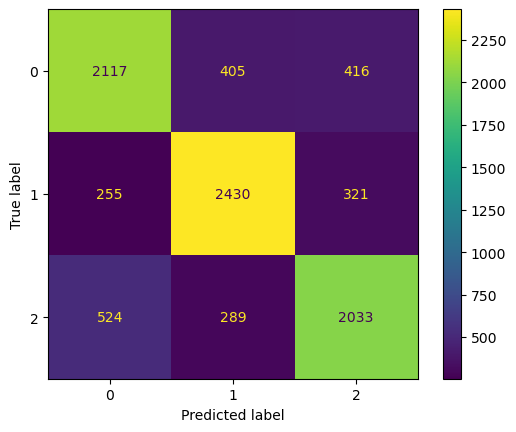

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()